In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np, scipy.stats as st
from google.colab import drive

In [63]:
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
tipo = 'small'

In [16]:
tipo = 'medium'

In [48]:
tipo = 'large'

In [ ]:
tipo = 'xlarge'

In [49]:
print(tipo)

large


In [50]:
cluster = pd.read_csv('/content/drive/MyDrive/sbrc2023/'+tipo+'/cluster2_'+tipo+'.txt')
cluster.iloc[100:110,:]

,Unnamed: 0,Name,Succ,Fail,SendRate(TPS),MaxLatency(s),MinLatency(s),AvgLatency(s),Throughput(TPS),Unnamed: 9
100,NaN,rnd01,1204,0,200.0,2.10,0.07,0.18,149.0,NaN
101,NaN,rnd02,1204,0,200.5,2.21,0.06,0.15,148.4,NaN
102,NaN,rnd03,1204,0,199.0,2.07,0.06,0.15,149.0,NaN
103,NaN,rnd04,1204,0,199.8,2.17,0.06,0.15,148.9,NaN
104,NaN,rnd05,1203,0,200.2,2.09,0.06,0.13,149.0,NaN
105,NaN,rnd06,1204,0,199.4,2.16,0.05,0.13,148.8,NaN
106,NaN,rnd07,1204,0,200.6,2.10,0.06,0.13,149.3,NaN
107,NaN,rnd08,1204,0,200.3,2.08,0.05,0.11,149.2,NaN
108,NaN,rnd09,1204,0,200.0,2.07,0.05,0.11,149.1,NaN
109,NaN,rnd10,1204,0,200.4,2.08,0.06,0.12,149.1,NaN


In [51]:
vaz = []
rdns = cluster['Throughput(TPS)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  vaz.append(np.mean(i))
print([ float("%.02f" % x) for x in vaz])

[7.94, 15.4, 30.3, 45.2, 60.07, 75.02, 89.95, 104.8, 119.59, 134.27, 148.98]


In [52]:
lat = []
rdns = cluster['AvgLatency(s)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  lat.append(np.mean(i))
print([ float("%.02f" % x) for x in lat])

[0.57, 0.32, 0.19, 0.15, 0.13, 0.11, 0.1, 0.11, 0.11, 0.12, 0.14]


In [53]:
vm1 = pd.read_csv('/content/drive/MyDrive/sbrc2023/'+tipo+'/TxMonitor-vm1-cluster2_'+tipo+'.csv')
vm2 = pd.read_csv('/content/drive/MyDrive/sbrc2023/'+tipo+'/TxMonitor-vm2-cluster2_'+tipo+'.csv')
vm3 = pd.read_csv('/content/drive/MyDrive/sbrc2023/'+tipo+'/TxMonitor-vm3-cluster2_'+tipo+'.csv')
vm1

,Unnamed: 0,Unnamed: 0.1,indice,memoria(%),cpu(%),Block-use(bytes),Net-in(bytes),Net-out(bytes),TimeStamp,round
0,0,0,1,8.9,50.0,0,0,0,1671300001,1
1,1,171,172,9.4,7.6,4501504,5997941,8893381,1671300173,1
2,2,119,120,9.3,7.5,3092480,4172589,6152601,1671300121,1
3,3,67,68,9.1,7.0,1708032,2351163,3417984,1671300069,1
4,4,115,116,9.3,6.6,2703360,3815711,5481589,1671300117,1
...,...,...,...,...,...,...,...,...,...,...
655,655,222,223,10.9,55.0,107016192,81800168,170240972,1671306223,11
656,656,191,192,10.8,54.9,84574208,64806073,134590296,1671306192,11
657,657,242,243,10.9,48.9,108298240,83120472,172580085,1671306243,11
658,658,89,90,10.5,47.2,36925440,28323544,58615498,1671306090,11


In [54]:
def filtro_cpu_mem(vm):
  vm__cpu_mean = []
  vm__mem_mean = []
  vm__cpu_erro = []
  vm__mem_erro = []
  vm_cpu_filtro = []
  vm_mem_filtro = []
  cpu = []
  mem = []
  for i in range(1,12):
      l_round_x = vm.query('round==%s'%i)
      cpu = l_round_x['cpu(%)']
      memoria = l_round_x['memoria(%)']
      vm_cpu_filtro.append(cpu.tolist())
      vm_mem_filtro.append(memoria.tolist())

      cpu_mean = np.mean(cpu)
      mem_mean = np.mean(memoria)

      cpu_erro = st.t.interval(0.05, len(cpu)-1, loc=np.mean(cpu), scale=st.sem(cpu))
      mem_erro = st.t.interval(0.05, len(memoria)-1, loc=np.mean(memoria), scale=st.sem(memoria))

      vm__cpu_mean.append(cpu_mean)
      vm__mem_mean.append(mem_mean)

      vm__cpu_erro.append(cpu_erro[1] - cpu_erro[0])
      vm__cpu_erro.append(mem_erro[1] - mem_erro[0])
  return vm_cpu_filtro,vm_mem_filtro

In [38]:
def net_dif(net_val_cum, unit):
  l = list(net_val_cum)
  l = [ (l[i+1]-l[i])*8/unit for i in range(len(l)-1) ]

  # #debug
  #l = list(vm1.query('round==%s'%1)['Net-in(bytes)'])
  #print(l, len(l))
  #l = [ l[i+1]-l[i] for i in range(len(l)-1) ]
  #print(l, len(l))  

  return l

In [39]:
def filtro_net(vm):
  vm__netin_mean = []
  vm__netout_mean = []
  vm__netin_erro = []
  vm__netout_erro = []
  vm_netin_filtro = []
  vm_netout_filtro = []
  l_round_x =[]
  netin =[]
  netout = []
  for i in range(1,12):
      l_round_x = vm.query('round==%s'%i)
      netin = net_dif(l_round_x['Net-in(bytes)'], 1000**2)
      netout = net_dif(l_round_x['Net-out(bytes)'], 1000**2)
      vm_netin_filtro.append(netin)
      vm_netout_filtro.append(netout)

  return  vm_netin_filtro, vm_netout_filtro

**VM1**

In [55]:
vm1_cpu,vm1_mem = filtro_cpu_mem(vm1)
vm1_netin,vm1_netout = filtro_net(vm1)
print((vm1_cpu))
print(vm1_mem)
print(vm1_netin)
print(vm1_netout)

[[50.0, 7.6, 7.5, 7.0, 6.6, 6.5, 6.5, 6.5, 6.5, 6.5, 6.4, 6.1, 6.1, 6.0, 6.0, 5.6, 5.6, 5.6, 5.6, 5.5, 5.4, 5.2, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.0, 4.6, 4.6, 4.6, 4.6, 4.6, 4.5, 4.5, 4.5, 4.1, 4.1, 4.1, 4.1, 4.1, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.6, 3.6, 3.6, 3.6, 3.5, 3.5], [11.7, 11.6, 11.0, 10.6, 10.5, 10.4, 10.2, 10.2, 10.1, 10.1, 10.1, 10.1, 10.1, 10.0, 9.6, 9.5, 9.5, 9.3, 9.2, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.0, 9.0, 8.8, 8.8, 8.7, 8.6, 8.6, 8.6, 8.6, 8.6, 8.3, 8.2, 8.2, 8.2, 8.2, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 7.9, 7.7, 7.7, 7.7, 7.7, 7.3, 7.2, 7.2, 7.1, 6.7, 6.7, 6.6, 6.6], [19.8, 19.3, 18.9, 18.9, 18.6, 18.3, 18.3, 18.2, 17.9, 17.8, 17.8, 17.6, 17.5, 17.3, 17.3, 17.3, 17.3, 17.0, 17.0, 16.9, 16.8, 16.8, 16.7, 16.7, 16.6, 16.6, 16.5, 16.5, 16.5, 16.4, 16.4, 16.4, 16.3, 16.2, 16.1, 16.0, 16.0, 15.9, 15.8, 15.8, 15.7, 15.7, 15.6, 15.5, 15.5, 15.5, 15.5, 15.4, 15.4, 15.2, 15.2, 15.1, 15.0, 14.9, 14.7, 13.9, 12.8, 12.6, 11.5, 10.0], [27.7, 27.4, 27.0,

**VM2**

In [56]:
vm2_cpu,vm2_mem = filtro_cpu_mem(vm2)
vm2_netin,vm2_netout = filtro_net(vm2)
print(vm2_cpu)
print(vm2_mem)
print(vm2_netin)
print(vm2_netout)

[[5.0, 4.0, 4.0, 3.5, 3.5, 3.4, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], [4.5, 4.5, 4.5, 4.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.4, 3.1, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.6, 2.6, 2.6, 2.6, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5], [7.9, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.5, 6.5, 6.5, 6.5, 6.1, 6.1, 6.1, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.6, 5.6, 5.6, 5.6, 5.5, 5.5, 5.5, 5.5, 5.5, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 4.6, 4.6, 4.6, 4.6, 4.6, 4.5, 4.5, 4.1, 4.0, 4.0, 4.0, 3.6, 3.6, 3.6], [10.0, 9.9, 9.0, 9.0, 9.0, 8.6, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.3, 8.1, 8.1, 8.1, 8.0, 8.0, 8

**VM3**

In [57]:
vm3_cpu,vm3_mem = filtro_cpu_mem(vm3)
vm3_netin,vm3_netout = filtro_net(vm3)
print(vm3_cpu)
print(vm3_mem)
print(vm3_netin)
print(vm3_netout)

[[50.0, 7.2, 6.5, 6.5, 6.1, 6.0, 5.6, 5.6, 5.6, 5.6, 5.5, 5.5, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.0, 4.6, 4.6, 4.6, 4.6, 4.6, 4.5, 4.5, 4.5, 4.5, 4.5, 4.1, 4.1, 4.1, 4.1, 4.1, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.5, 3.5, 3.5, 3.1, 3.1, 3.0, 3.0, 3.0, 3.0], [10.9, 10.4, 10.1, 9.5, 8.7, 8.6, 8.5, 8.5, 8.5, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.0, 7.7, 7.7, 7.7, 7.6, 7.6, 7.6, 7.5, 7.5, 7.3, 7.2, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 7.1, 6.8, 6.7, 6.7, 6.7, 6.6, 6.6, 6.6, 6.6, 6.5, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.1, 6.1, 6.1, 5.7, 5.7, 5.7, 5.2, 5.0, 5.0, 4.7], [50.0, 18.2, 16.4, 16.3, 15.3, 15.3, 15.3, 15.0, 14.9, 14.4, 14.4, 14.1, 14.1, 14.1, 14.1, 13.9, 13.9, 13.8, 13.8, 13.8, 13.6, 13.5, 13.4, 13.3, 13.3, 13.3, 13.3, 13.1, 13.1, 13.0, 12.9, 12.9, 12.9, 12.8, 12.7, 12.6, 12.6, 12.5, 12.4, 12.4, 12.4, 12.3, 12.1, 12.1, 12.0, 11.9, 11.9, 11.9, 11.8, 11.7, 11.6, 11.5, 11.4, 10.9, 10.8, 10.4, 10.2, 9.2, 8.7, 8.4], [100.0, 22.6, 22.0, 21.9, 21.7, 

In [58]:
def grafico(filtro,txt1,txt2,y,ytick,type=0,outfile=0):
    x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
    p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
    plt.rcParams.update({'font.size':20})
    fig,ax = plt.subplots(figsize =(12,6))
    ax.set_xlabel('Carga (tps)')
    ax.set_ylabel(txt1)
    if(type==1): # net MBytes/seg.
      ax.set_ylim(0, 10)
      ax.set_yticks(range(0, 11, 2))
    else:
      ax.set_ylim(-3, 110)    
      ax.set_yticks(range(0, 110, 20))
    ax.boxplot(filtro, widths=10 ,labels=x, positions=p)
    ax2 = ax.twinx()
    ax2.set_ylabel(txt2,color='#1f77b4')
    ax2.set_ylim(0, 1)
    ax2.tick_params(color='#1f77b4', labelcolor='#1f77b4')
    ax2.set_xlim(0, 210)
    ax2.plot(p,y,marker="*",label="vazão", linewidth=3, markersize=10)
    plt.yticks(ytick)
    return plt

**VM1**

"\nplt1_mem = grafico(vm1_mem,'Memoria (%)','Vazão (tps)',vaz)\nplt1_mem.savefig('grafico_plt_mem_vm1_cluster2.pdf')\n\nplt1_netin = grafico(vm1_netin,'Net In (mbps)',,'Vazão (tps)',vaz, type=1)\nplt1_netin.savefig('grafico_plt_netin_vm1_cluster2.pdf')\n\nplt1_netout = grafico(vm1_netout,'Net Out (mbps)',,'Vazão (tps)',vaz, type=1)\nplt1_netout.savefig('grafico_plt_netout_vm1_cluster2.pdf')\n"

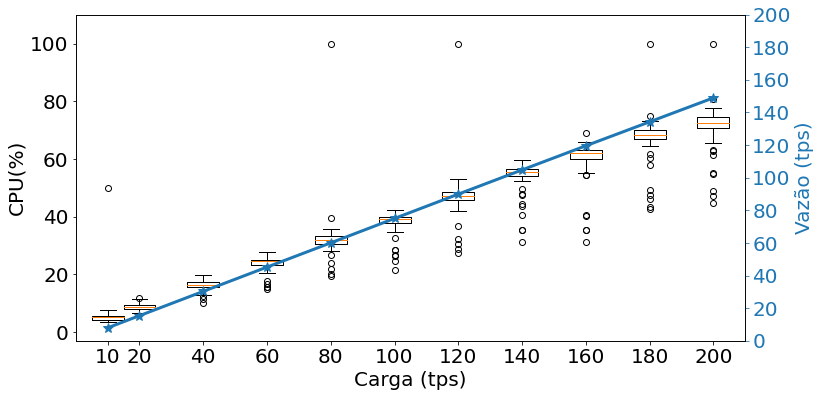

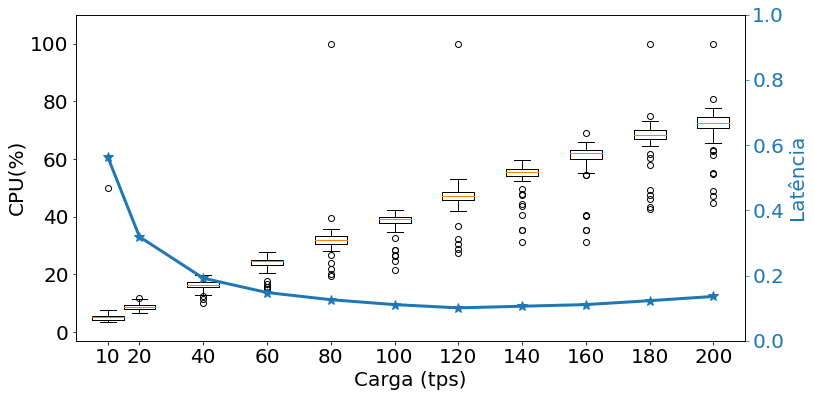

In [59]:
plt1_cpu = grafico(vm1_cpu,'CPU(%)','Vazão (tps)',vaz,[0, 20, 40, 60, 80, 100,120,140,160,180,200])
plt1_cpu.savefig('grafico_plt_CPU_vm1_vaz_cluster2_'+tipo+'.pdf')

plt1_cpu = grafico(vm1_cpu,'CPU(%)','Latência',lat,[0,0.2,0.4,0.6,0.8,1])
plt1_cpu.savefig('grafico_plt_CPU_vm1_lat_cluster2_'+tipo+'.pdf')
'''
plt1_mem = grafico(vm1_mem,'Memoria (%)','Vazão (tps)',vaz)
plt1_mem.savefig('grafico_plt_mem_vm1_cluster2.pdf')

plt1_netin = grafico(vm1_netin,'Net In (mbps)',,'Vazão (tps)',vaz, type=1)
plt1_netin.savefig('grafico_plt_netin_vm1_cluster2.pdf')

plt1_netout = grafico(vm1_netout,'Net Out (mbps)',,'Vazão (tps)',vaz, type=1)
plt1_netout.savefig('grafico_plt_netout_vm1_cluster2.pdf')
'''

VM2

"\nplt2_mem = grafico(vm1_mem,'Memoria (%)','Vazão (tps)',vaz)\nplt2_mem.savefig('grafico_plt_mem_vm2_cluster2.pdf')\n\nplt2_netin = grafico(vm1_netin,'Net In (mbps)','Vazão (tps)',vaz,type=1)\nplt2_netin.savefig('grafico_plt_netin_vm2_cluster2.pdf')\n\nplt2_netout = grafico(vm1_netout,'Net Out (mbps)','Vazão (tps)',vaz, type=1)\nplt2_netout.savefig('grafico_plt_netout_vm2_cluster2.pdf')\n"

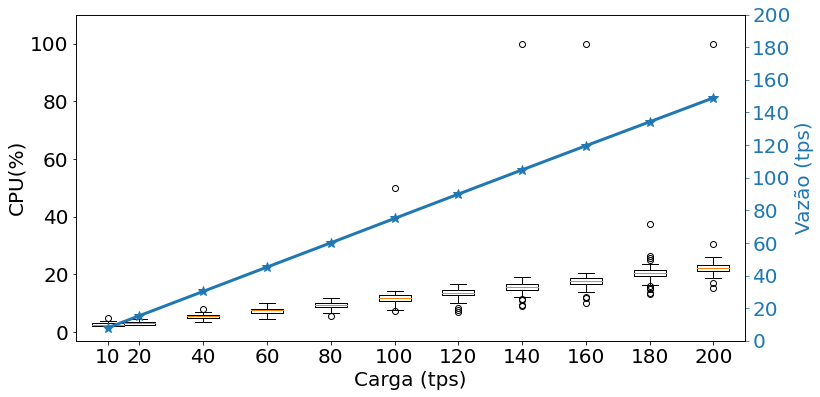

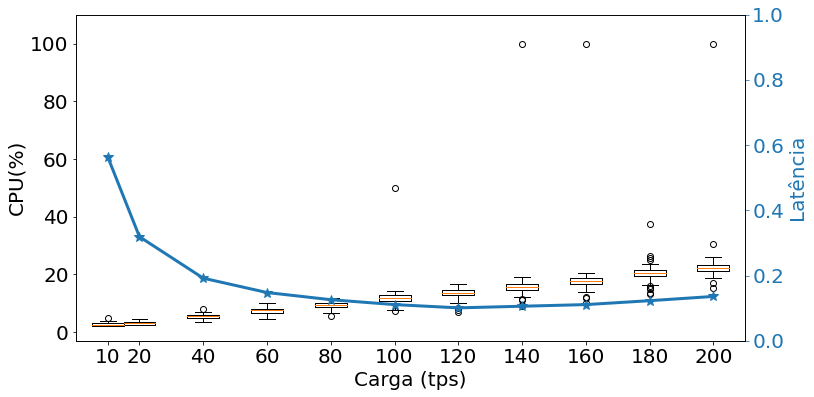

In [60]:
plt2_cpu = grafico(vm2_cpu,'CPU(%)','Vazão (tps)',vaz,[0, 20, 40, 60, 80, 100,120,140,160,180,200])
plt2_cpu.savefig('grafico_plt_CPU_vm2_vaz_cluster2_'+tipo+'.pdf')

plt2_cpu = grafico(vm2_cpu,'CPU(%)','Latência',lat,[0,0.2,0.4,0.6,0.8,1])
plt2_cpu.savefig('grafico_plt_CPU_vm2_lat_cluster2_'+tipo+'.pdf')

'''
plt2_mem = grafico(vm1_mem,'Memoria (%)','Vazão (tps)',vaz)
plt2_mem.savefig('grafico_plt_mem_vm2_cluster2.pdf')

plt2_netin = grafico(vm1_netin,'Net In (mbps)','Vazão (tps)',vaz,type=1)
plt2_netin.savefig('grafico_plt_netin_vm2_cluster2.pdf')

plt2_netout = grafico(vm1_netout,'Net Out (mbps)','Vazão (tps)',vaz, type=1)
plt2_netout.savefig('grafico_plt_netout_vm2_cluster2.pdf')
'''

**VM3**

"\nplt3_mem = grafico(vm1_mem,'Memoria (%)','Vazão (tps)',vaz)\nplt3_mem.savefig('grafico_plt_mem_vm3_cluster2.pdf')\n\nplt3_netin = grafico(vm1_netin,'Net In (mbps)','Vazão (tps)',vaz, type=1)\nplt3_netin.savefig('grafico_plt_netin_vm3_cluster2.pdf')\n\nplt3_netout = grafico(vm1_netout,'Net Out (mbps)','Vazão (tps)',vaz, type=1)\nplt3_netout.savefig('grafico_plt_netout_vm3_cluster2.pdf')\n"

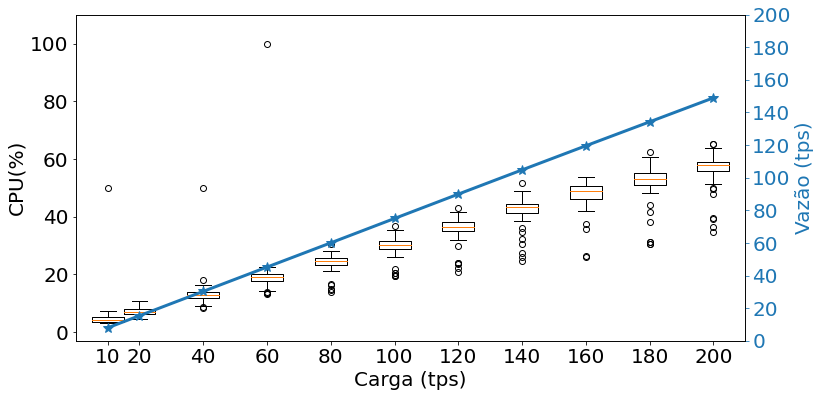

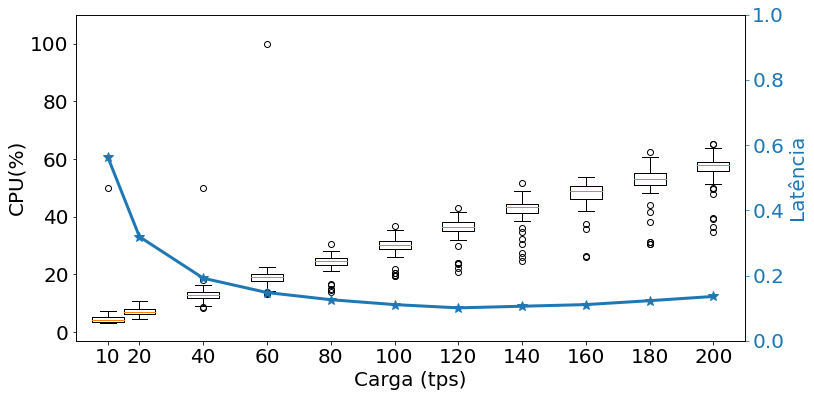

In [61]:
plt3_cpu = grafico(vm3_cpu,'CPU(%)','Vazão (tps)',vaz,[0, 20, 40, 60, 80, 100,120,140,160,180,200])
plt3_cpu.savefig('grafico_plt_CPU_vm3__vaz_cluster2_'+tipo+'.pdf')

plt3_cpu = grafico(vm3_cpu,'CPU(%)','Latência',lat,[0,0.2,0.4,0.6,0.8,1])
plt3_cpu.savefig('grafico_plt_CPU_vm3_lat_cluster2_'+tipo+'.pdf')

'''
plt3_mem = grafico(vm1_mem,'Memoria (%)','Vazão (tps)',vaz)
plt3_mem.savefig('grafico_plt_mem_vm3_cluster2.pdf')

plt3_netin = grafico(vm1_netin,'Net In (mbps)','Vazão (tps)',vaz, type=1)
plt3_netin.savefig('grafico_plt_netin_vm3_cluster2.pdf')

plt3_netout = grafico(vm1_netout,'Net Out (mbps)','Vazão (tps)',vaz, type=1)
plt3_netout.savefig('grafico_plt_netout_vm3_cluster2.pdf')
'''